# 1. 연구 목표 설정
- 유사서비스 : 구글번역, 파파고, 카카오번역 등
  - 언어 감지 파트
- 목적
  - '머신러닝을 이용하여 서비스를 어떻게 구축하는가?'에 대한 통찰
- 방법
  - 알파벳권 언어 데이터(샘플)를 학습하여 해당 원문이 어느 언어인지를 감지
  - 알파벳권 한정
  - 핵심 이론 : a - z까지 사용하는 빈도가 언어별로 다르다 (관련 논문으로 증명됨)
  - 독립변수
    - a - z까지 각각의 빈도수 => feature는 26개
  - 종속변수(정답, class, label)
    - en(영어), fr(프랑스어), id(인도네시아어), tl(타갈로그어) 등
  - 머신러닝 > 지도학습 (feature + label)
  - 여기서 알고리즘은 크게 중요시하지 않겠음
- 산출물
  - 웹서비스
  - 파이썬 기반으로 구현(머신러닝 지도학습법으로 만들어진 모델을 구동할 때, 해당 모델은 파이썬으로 구현되어 있으므로, 타 언어로 작동 시 원활하지 않음)
  - ajax 사용
  - 성능평가, 최적화 부분은 생략


# 2. 데이터 수집 / 확보
- 실전 : 위키피디아에서 수집 ('동일한 내용에 대해서 각각 언어로 구성된 텍스트를 구할 수 있을 것이다'라는 예상 -> 같은 맥락에서 동일한 책을 번역한 것을 모으면 더 정확한 데이터 획득 可)
- 수업용 : 데이터를 제공

In [1]:
# 방법 : 해당 사이트에 접속해서 데이터를 바로 긁으면 된다.
# 웹스크래핑
target_site = "https://en.wikipedia.org/wiki/Tesla,_Inc."
target_site

'https://en.wikipedia.org/wiki/Tesla,_Inc.'

In [2]:
# 2-1. 모듈 가져오기
# html 문서를 가져오는 요청 모듈
import urllib.request as req
# DOM트리를 띄워서 데이터를 추출하는 모듈
from bs4 import BeautifulSoup

In [3]:
# 2-2. 문서 요청
res = req.urlopen(target_site)

In [4]:
# 2-3. 파싱
soup = BeautifulSoup(res, 'html5lib')

In [5]:
# 2-4. 데이터 추출
# 대상 특정 : css selector => #mw-content-text p
ps = soup.select('#mw-content-text p')
len(ps)

193

In [6]:
ps[5]

<p>Tesla operates multiple production and assembly plants. Its main vehicle manufacturing facility is at <a href="/wiki/Tesla_Factory" title="Tesla Factory">Tesla Factory</a><sup class="reference" id="cite_ref-13"><a href="#cite_note-13">[12]</a></sup> in <a href="/wiki/Fremont,_California" title="Fremont, California">Fremont, California</a>; <a href="/wiki/Giga_Nevada" title="Giga Nevada">Giga Nevada</a>,<sup class="reference" id="cite_ref-14"><a href="#cite_note-14">[13]</a></sup> <a href="/wiki/Giga_New_York" title="Giga New York">Giga New York</a>, and <a href="/wiki/Giga_Shanghai" title="Giga Shanghai">Giga Shanghai</a> are other facilities. Its main products include the <a href="/wiki/Tesla_Model_S" title="Tesla Model S">Model S</a>,<sup class="reference" id="cite_ref-15"><a href="#cite_note-15">[14]</a></sup> <a href="/wiki/Tesla_Model_3" title="Tesla Model 3">Model 3</a>,<sup class="reference" id="cite_ref-16"><a href="#cite_note-16">[15]</a></sup> <a href="/wiki/Tesla_Model_X"

In [7]:
# 2-5. 데이터 정제
# 마크업을 제거, 원문 텍스트만 획득
type(ps[5])

bs4.element.Tag

In [8]:
ps[5].text.strip()

'Tesla operates multiple production and assembly plants. Its main vehicle manufacturing facility is at Tesla Factory[12] in Fremont, California; Giga Nevada,[13] Giga New York, and Giga Shanghai are other facilities. Its main products include the Model S,[14] Model\xa03,[15] Model X,[16] and Model Y[17] cars, and the Powerwall,[18] Powerpack,[19] and Megapack[20] batteries. It also produces and sells solar panels,[21] solar roof tiles,[22] and some related products.[23]'

In [9]:
type(ps[5].text.strip())

str

In [10]:
# 대상 원문 내부(문자열)에서 특정 단어/패턴/...을 제거/추출 등의 처리를 해야한다면 정규식을 사용한다.
# 전체 데이터를 하나로 묶은 다음에 한번에 정규식 처리하는 것이 적합 -> 후반 작업

In [11]:
# 데이터를 한개의 덩어리로 합친다.
tmp = [p.text.strip() for p in ps]

In [12]:
tmp[:5]

['',
 '',
 '1,651 MWh batteries[4] (2019)',
 'Tesla, Inc. (formerly Tesla Motors, Inc.) is an American electric vehicle and clean energy company based in Palo Alto, California.[10] The company specializes in electric vehicle manufacturing, battery energy storage from home to grid scale and, through its acquisition of SolarCity, solar panel and solar roof tile manufacturing.[11]',
 'Founded in July 2003 by engineers Martin Eberhard and Marc Tarpenning as Tesla Motors, the company’s name is a tribute to inventor and electrical engineer Nikola Tesla. The next three employees were Ian Wright, Elon Musk, and J. B. Straubel, all of whom are named as co-founders of the company.[2] Musk, who formerly served as chairman and is the current CEO, said that he envisioned Tesla Motors as a technology company and independent automaker, aimed at eventually offering electric cars at prices affordable to the average consumer. In February 2017, Tesla Motors shortened its name to Tesla, Inc.']

In [13]:
# 리스트를 한개의 문자열로 병합
src_txt = ''.join(tmp)
src_txt

'1,651 MWh batteries[4] (2019)Tesla, Inc. (formerly Tesla Motors, Inc.) is an American electric vehicle and clean energy company based in Palo Alto, California.[10] The company specializes in electric vehicle manufacturing, battery energy storage from home to grid scale and, through its acquisition of SolarCity, solar panel and solar roof tile manufacturing.[11]Founded in July 2003 by engineers Martin Eberhard and Marc Tarpenning as Tesla Motors, the company’s name is a tribute to inventor and electrical engineer Nikola Tesla. The next three employees were Ian Wright, Elon Musk, and J. B. Straubel, all of whom are named as co-founders of the company.[2] Musk, who formerly served as chairman and is the current CEO, said that he envisioned Tesla Motors as a technology company and independent automaker, aimed at eventually offering electric cars at prices affordable to the average consumer. In February 2017, Tesla Motors shortened its name to Tesla, Inc.Tesla operates multiple production 

In [14]:
# 알파벳만 남겨야 한다.
# 알파벳이 아닌 문자 제거(숫자, 특수문자 등 포함) => 정규식
# 알파벳 => 소문자 혹은 대문자로 통일(자연어 처리 쪽에서는 주로 소문자 활용) => lower()

In [15]:
# 정규식 처리
import re

In [16]:
# [] 문자 1개
# * : '0 - 무한대'로 올 수 있다.
# a-z : 알파벳 소문자 / A-Z : 알파벳 대문자
# [^] : 해당 문자만 제외하고
# [^a-zA-Z]* : a-zA-Z를 제외하고 모든 문자가 0~무한대까지 올 수 있다. => 알파벳 제외한 모든 문자를 특정
p = re.compile('[^a-zA-Z]*')

In [17]:
# 정규식 반영
tmp = p.sub('', src_txt)
tmp.lower()

'mwhbatteriesteslaincformerlyteslamotorsincisanamericanelectricvehicleandcleanenergycompanybasedinpaloaltocaliforniathecompanyspecializesinelectricvehiclemanufacturingbatteryenergystoragefromhometogridscaleandthroughitsacquisitionofsolarcitysolarpanelandsolarrooftilemanufacturingfoundedinjulybyengineersmartineberhardandmarctarpenningasteslamotorsthecompanysnameisatributetoinventorandelectricalengineernikolateslathenextthreeemployeeswereianwrightelonmuskandjbstraubelallofwhomarenamedascofoundersofthecompanymuskwhoformerlyservedaschairmanandisthecurrentceosaidthatheenvisionedteslamotorsasatechnologycompanyandindependentautomakeraimedateventuallyofferingelectriccarsatpricesaffordabletotheaverageconsumerinfebruaryteslamotorsshorteneditsnametoteslaincteslaoperatesmultipleproductionandassemblyplantsitsmainvehiclemanufacturingfacilityisatteslafactoryinfremontcaliforniagiganevadagiganewyorkandgigashanghaiareotherfacilitiesitsmainproductsincludethemodelsmodelmodelxandmodelycarsandthepowerwallpo

In [18]:
# 단어 간의 공백은 살리기, 의미 살리기 (샘플)
p1 = re.compile('[^a-zA-Z ]*')
tmp1 = p1.sub('', src_txt)
tmp1.lower()

' mwh batteries tesla inc formerly tesla motors inc is an american electric vehicle and clean energy company based in palo alto california the company specializes in electric vehicle manufacturing battery energy storage from home to grid scale and through its acquisition of solarcity solar panel and solar roof tile manufacturingfounded in july  by engineers martin eberhard and marc tarpenning as tesla motors the companys name is a tribute to inventor and electrical engineer nikola tesla the next three employees were ian wright elon musk and j b straubel all of whom are named as cofounders of the company musk who formerly served as chairman and is the current ceo said that he envisioned tesla motors as a technology company and independent automaker aimed at eventually offering electric cars at prices affordable to the average consumer in february  tesla motors shortened its name to tesla inctesla operates multiple production and assembly plants its main vehicle manufacturing facility is

- 위와 같은 과정으로 데이터를 획득하여 준비하면 된다.
- 시간상 제공하는 데이터를 사용
  - dir : /content/drive/My Drive/Colab Notebooks/ml/1_data
    - train
    - test
  - 파일 구성
    - 레이블-번호.txt

In [19]:
# 2-6. 데이터 로드
# 2-6-1. 파일 목록 가져오기
import glob

In [20]:
files = glob.glob('/content/drive/My Drive/Colab Notebooks/ml/1_data/train/*.txt')
files.sort()
files 

['/content/drive/My Drive/Colab Notebooks/ml/0_data/train/en-1.txt',
 '/content/drive/My Drive/Colab Notebooks/ml/0_data/train/en-2.txt',
 '/content/drive/My Drive/Colab Notebooks/ml/0_data/train/en-3.txt',
 '/content/drive/My Drive/Colab Notebooks/ml/0_data/train/en-4.txt',
 '/content/drive/My Drive/Colab Notebooks/ml/0_data/train/en-5.txt',
 '/content/drive/My Drive/Colab Notebooks/ml/0_data/train/fr-10.txt',
 '/content/drive/My Drive/Colab Notebooks/ml/0_data/train/fr-6.txt',
 '/content/drive/My Drive/Colab Notebooks/ml/0_data/train/fr-7.txt',
 '/content/drive/My Drive/Colab Notebooks/ml/0_data/train/fr-8.txt',
 '/content/drive/My Drive/Colab Notebooks/ml/0_data/train/fr-9.txt',
 '/content/drive/My Drive/Colab Notebooks/ml/0_data/train/id-11.txt',
 '/content/drive/My Drive/Colab Notebooks/ml/0_data/train/id-12.txt',
 '/content/drive/My Drive/Colab Notebooks/ml/0_data/train/id-13.txt',
 '/content/drive/My Drive/Colab Notebooks/ml/0_data/train/id-14.txt',
 '/content/drive/My Drive/Col

# 3. 데이터 준비
- 데이터의 품질 향상
- 레이블 획득, 알파벳 빈도 계산
- 데이터 전처리 수행
- json파일로 덤프(적재)
- 알파벳은 문자 => 학습에 필요한 데이터는 '수치'다.
- 최종 데이터는 df
  - shape : (n,26+1) => 1_data/train/*.txt를 활용하는 현재로서는 (20, 27)로 나와야 함.
- 컬럼
  - a ~ z, label => 총 27개
- 인덱스
  - 데이터 개수대로 20개(train 기준)

## 정답 정보 추출


In [21]:
# 개별 데이터 추출해보기
# 정답 추출
files[0]

'/content/drive/My Drive/Colab Notebooks/ml/0_data/train/en-1.txt'

In [22]:
# /content/drive/My Drive/Colab Notebooks/ml/1_data/train/en-1.txt에서 en 추출
# 실습
files[0].replace('/content/drive/My Drive/Colab Notebooks/ml/1_data/train/', '')[:2]

'en'

In [23]:
# 강의
# 경로 상에서 파일명을 찾아서 처리
import os

In [24]:
os.path.basename(files[0])

'en-1.txt'

In [25]:
os.path.basename(files[0])[:2]

'en'

In [26]:
import os
name = os.path.basename(files[0])
name

'en-1.txt'

In [27]:
# { , } : 개수, 생략 가능
# {2} : 2개
# ^ : 해당 표현을 [] 바깥에서 사용할 시 시작문자라는 뜻
p = re.compile('^[a-z]{2}')

In [28]:
p.match(name).group()

'en'

## 빈도 계산
- 파일을 읽는다
- 방법
  - 한글자씩 읽어서 a가 나오면 카운트 1 증가, ...
  - 특정문자열 내에 특정문자 카운트 계산
- 검증
  - 카운트 된 모든 문자에 대한 수를 합산 = 문자열의 길이

In [29]:
# 파일 오픈 및 닫기 => I/O라 close 까먹을 수도 있기 때문에 with문으로 처리
f = open(files[0])
f.close()

In [30]:
with open(files[0]) as f :
  # 파일을 읽는다 -> 소문자 처리 -> 정규식으로 알파벳만 남기기
  text = f.read().lower()
  p = re.compile('[^a-z]*')
  tmp = p.sub('', text)
  print(tmp[:100])
  pass

themainhenryfordmuseumbuildinghousessomeoftheclassroomsforthehenryfordacademyhenryfordacademyisthefi


In [31]:
# 문자열에서 한글자씩 추출 -> 카운트
for word in tmp :
  print(word)
  break

t


In [32]:
# t -> 몇번째 인덱스인가?
# t의 위치(아스키 코드상) - a의 위치
# 문자 -> 아스키코드 획득
ord('t'), ord('a'), ord('t') - ord('a')

(116, 97, 19)

In [33]:
# 알파벳 별 카운트를 계산하시오
# 실습
alphabets = list(range(97,123))

for i in range(0, len(alphabets)) :
  print(tmp.count(chr(alphabets[i])))

349
59
210
212
484
72
88
201
340
8
25
247
121
356
412
76
0
357
282
370
119
45
65
3
92
2


In [34]:
# 강의
cnts = [0] * 26
for word in tmp :
  cnts[ ord(word) - ord('a') ] += 1
print(cnts)

[349, 59, 210, 212, 484, 72, 88, 201, 340, 8, 25, 247, 121, 356, 412, 76, 0, 357, 282, 370, 119, 45, 65, 3, 92, 2]


In [35]:
with open(files[0]) as f :
  text = f.read().lower()
  p    = re.compile('[^a-z]*')
  tmp  = p.sub('', text)
  cnts = [0] * 26
  for word in tmp :
    cnts[ ord(word) - ord('a') ] += 1
  pass

In [36]:
# 카운트의 총합, 전체 문자 수의 총합은 동일
sum(cnts), len(tmp)

(4595, 4595)

In [37]:
# 전체 문자 수에서 개별 알파벳이 차지하는 비율 -> softmax
# 정규화를 수행해라
# cnts의 멤버들을 하나씩 거내서 정규ㅘ 처리하고 다시 넣는다 => map()
# cnt_norms를 [a의 빈도수 / 전체 문자수, ...]로 나오게끔 처리
# 마지막에 sum(cnt_norms) => 1.0으로 나와야 함
total_cnt = sum(cnts)
cnt_norms = list(map( lambda x : x / total_cnt, cnts))
sum(cnt_norms)

1.0

In [38]:
print(cnt_norms)

[0.07595212187159957, 0.012840043525571273, 0.04570184983677911, 0.04613710554951034, 0.10533188248095757, 0.015669205658324265, 0.019151251360174103, 0.043743199129488576, 0.07399347116430903, 0.0017410228509249185, 0.00544069640914037, 0.05375408052230685, 0.026332970620239392, 0.07747551686615888, 0.08966267682263329, 0.016539717083786723, 0.0, 0.07769314472252448, 0.061371055495103376, 0.08052230685527748, 0.02589771490750816, 0.009793253536452665, 0.014145810663764961, 0.0006528835690968443, 0.02002176278563656, 0.0004352557127312296]


In [39]:
# 파일 1개에 대한 처리
with open(files[0]) as f :
  # 정답(언어코드)
  label = os.path.basename(files[0])[:2]

  text = f.read().lower()
  p    = re.compile('[^a-z]*')
  # a-z를 제외한 모든 문자들을 ''(공백)으로 치환해라
  tmp  = p.sub('', text)
  cnts = [0] * 26
  for word in tmp :
    cnts[ ord(word) - ord('a') ] += 1
  total_cnt = sum(cnts)
  # 문서 1개에 대한 a-z의 총빈도 비율 -> feature
  cnt_norms = list(map( lambda x : x / total_cnt, cnts))
  pass

In [40]:
len(files), files[0]

(20, '/content/drive/My Drive/Colab Notebooks/ml/0_data/train/en-1.txt')

In [41]:
# 파일 n개에 대한 처리 : train계열 / test계열

# 정답들
labels = list()
# 빈도들
freqs = list()

for fName in files :
  with open(fName) as f :
    label = os.path.basename(fName)[:2]
    text  = f.read().lower()
    p     = re.compile('[^a-z]*')
    tmp   = p.sub('', text)
    cnts  = [0] * 26
    for word in tmp :
      cnts[ ord(word) - ord('a') ] += 1
    total_cnt = sum(cnts)
    cnt_norms = list(map( lambda x : x / total_cnt, cnts))
    # 파일 1개당 추출한 데이터 수집
    labels.append(label)      # 정답 : 'en', 'fr', ...
    freqs.append(cnt_norms)   # a-z 빈도 : [0.01, ...], [0.002, ...], ...

  # feature를 담는 데이터는 label보다 1차원 더 높다
  # label(labels)은 1차원, feature(freqs)는 2차원

In [42]:
len(labels), len(freqs), len(freqs[0])

(20, 20, 26)

In [43]:
# dir : 데이터가 존재하는 디렉토리
# 리스트 타입으로 리턴
def makeData_listtype(dir = 'train') :
  files = glob.glob(f'/content/drive/My Drive/Colab Notebooks/ml/1_data/{dir}/*.txt')
  files.sort()

  labels = list()
  freqs = list()
  for fName in files :
    with open(fName) as f :
      label = os.path.basename(fName)[:2]
      text  = f.read().lower()
      p     = re.compile('[^a-z]*')
      tmp   = p.sub('', text)
      cnts  = [0] * 26
      for word in tmp :
        cnts[ ord(word) - ord('a') ] += 1
      total_cnt = sum(cnts)
      cnt_norms = list(map( lambda x : x / total_cnt, cnts))
      labels.append(label)
      freqs.append(cnt_norms)
  # 최종 학습/예측에 사용할 데이터를 리턴
  return labels, freqs

In [44]:
# 딕셔너리 타입으로 리턴
def makeData(dir = 'train') :
  files = glob.glob(f'/content/drive/My Drive/Colab Notebooks/ml/1_data/{dir}/*.txt')
  files.sort()

  labels = list()
  freqs = list()
  for fName in files :
    with open(fName) as f :
      label = os.path.basename(fName)[:2]
      text  = f.read().lower()
      p     = re.compile('[^a-z]*')
      tmp   = p.sub('', text)
      cnts  = [0] * 26
      for word in tmp :
        cnts[ ord(word) - ord('a') ] += 1
      total_cnt = sum(cnts)
      cnt_norms = list(map( lambda x : x / total_cnt, cnts))
      labels.append(label)
      freqs.append(cnt_norms)
  return {'labels' : labels, 'freqs' : freqs}

In [45]:
# 학습, 테스트에 필요한 데이터 생성
trainData = makeData()
testData  = makeData('test')

In [46]:
# json 덤프(중간 저장)
import json

In [47]:
with open('labels_freqs.json', 'w') as fp :
  json.dump([trainData, testData], fp)

## 용도(5단계에서 사용)
- 예측모델 훈련 시 사용하는 재료
  - 특징 : train > freqs
  - 정답 : train > labels
- 예측모델을 이용하여 예측 수행 시 사용하는 재료
  - 특징 : test > freqs
- 예측모델이 예측한 정답과 비교하여 정확도를 체크하는 재료
  - 정답 : test > labels

# 4. 데이터 분석
- EDA 분석, 시각적으로 증명
- 알파벳 빈도를 이용하여, 영어권 국가별로 언어를 구분할 수 있다.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [49]:
# 4-1. json 로드
with open('/content/labels_freqs.json') as f:
  tmp = json.load(f)
len(tmp)

2

In [50]:
# dataframe으로 구성
df_freqs = pd.DataFrame(tmp[0]['freqs'])
df_freqs.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.075952,0.012840,0.045702,0.046137,0.105332,0.015669,0.019151,0.043743,0.073993,0.001741,0.005441,0.053754,0.026333,0.077476,0.089663,0.016540,0.000000,0.077693,0.061371,0.080522,0.025898,0.009793,0.014146,0.000653,0.020022,0.000435
1,0.084178,0.019912,0.030404,0.038870,0.136998,0.017408,0.031239,0.027423,0.075355,0.002623,0.009777,0.042327,0.024204,0.053535,0.068797,0.020269,0.005485,0.090140,0.071659,0.077739,0.030643,0.013712,0.013950,0.002027,0.010731,0.000596
2,0.071646,0.012172,0.045643,0.032642,0.120055,0.014661,0.025173,0.023513,0.094606,0.002490,0.001660,0.056985,0.022407,0.075519,0.076625,0.020747,0.001660,0.053942,0.087967,0.081051,0.029046,0.018811,0.011895,0.000553,0.017981,0.000553
3,0.072210,0.027715,0.029977,0.039593,0.121041,0.016780,0.023567,0.059012,0.065234,0.001508,0.013009,0.044872,0.021493,0.058635,0.087670,0.016780,0.000377,0.059201,0.073341,0.093703,0.024321,0.005090,0.019608,0.006033,0.017534,0.001697
4,0.073806,0.020368,0.031099,0.039641,0.141261,0.020368,0.020368,0.056943,0.065046,0.003285,0.005913,0.039641,0.028909,0.062199,0.066141,0.018835,0.000438,0.072492,0.059571,0.095488,0.024967,0.010731,0.023872,0.003066,0.014893,0.000657


In [51]:
df_freqs.shape

(20, 26)

In [52]:
# 컬럼명을 a-z까지로 치환(대체/교환)하시오
from string import ascii_lowercase
ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [53]:
# 컬럼 전체 수정
# 실습
df_freqs.columns = [i for i in ascii_lowercase]
df_freqs.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
0,0.075952,0.012840,0.045702,0.046137,0.105332,0.015669,0.019151,0.043743,0.073993,0.001741,0.005441,0.053754,0.026333,0.077476,0.089663,0.016540,0.000000,0.077693,0.061371,0.080522,0.025898,0.009793,0.014146,0.000653,0.020022,0.000435
1,0.084178,0.019912,0.030404,0.038870,0.136998,0.017408,0.031239,0.027423,0.075355,0.002623,0.009777,0.042327,0.024204,0.053535,0.068797,0.020269,0.005485,0.090140,0.071659,0.077739,0.030643,0.013712,0.013950,0.002027,0.010731,0.000596
2,0.071646,0.012172,0.045643,0.032642,0.120055,0.014661,0.025173,0.023513,0.094606,0.002490,0.001660,0.056985,0.022407,0.075519,0.076625,0.020747,0.001660,0.053942,0.087967,0.081051,0.029046,0.018811,0.011895,0.000553,0.017981,0.000553
3,0.072210,0.027715,0.029977,0.039593,0.121041,0.016780,0.023567,0.059012,0.065234,0.001508,0.013009,0.044872,0.021493,0.058635,0.087670,0.016780,0.000377,0.059201,0.073341,0.093703,0.024321,0.005090,0.019608,0.006033,0.017534,0.001697
4,0.073806,0.020368,0.031099,0.039641,0.141261,0.020368,0.020368,0.056943,0.065046,0.003285,0.005913,0.039641,0.028909,0.062199,0.066141,0.018835,0.000438,0.072492,0.059571,0.095488,0.024967,0.010731,0.023872,0.003066,0.014893,0.000657


In [54]:
# 강의
df_freqs.columns = list(ascii_lowercase)
df_freqs.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
0,0.075952,0.012840,0.045702,0.046137,0.105332,0.015669,0.019151,0.043743,0.073993,0.001741,0.005441,0.053754,0.026333,0.077476,0.089663,0.016540,0.000000,0.077693,0.061371,0.080522,0.025898,0.009793,0.014146,0.000653,0.020022,0.000435
1,0.084178,0.019912,0.030404,0.038870,0.136998,0.017408,0.031239,0.027423,0.075355,0.002623,0.009777,0.042327,0.024204,0.053535,0.068797,0.020269,0.005485,0.090140,0.071659,0.077739,0.030643,0.013712,0.013950,0.002027,0.010731,0.000596
2,0.071646,0.012172,0.045643,0.032642,0.120055,0.014661,0.025173,0.023513,0.094606,0.002490,0.001660,0.056985,0.022407,0.075519,0.076625,0.020747,0.001660,0.053942,0.087967,0.081051,0.029046,0.018811,0.011895,0.000553,0.017981,0.000553
3,0.072210,0.027715,0.029977,0.039593,0.121041,0.016780,0.023567,0.059012,0.065234,0.001508,0.013009,0.044872,0.021493,0.058635,0.087670,0.016780,0.000377,0.059201,0.073341,0.093703,0.024321,0.005090,0.019608,0.006033,0.017534,0.001697
4,0.073806,0.020368,0.031099,0.039641,0.141261,0.020368,0.020368,0.056943,0.065046,0.003285,0.005913,0.039641,0.028909,0.062199,0.066141,0.018835,0.000438,0.072492,0.059571,0.095488,0.024967,0.010731,0.023872,0.003066,0.014893,0.000657


In [55]:
# 레이블 df
df_labels = pd.DataFrame(tmp[0]['labels'])
df_labels.head()

,0
0,en
1,en
2,en
3,en
4,en


In [56]:
df_labels.columns = ['labels']
df_labels.head()

,labels
0,en
1,en
2,en
3,en
4,en


In [57]:
# 병합
# concat
df_tmp = pd.concat([df_freqs, df_labels], axis=1)
df_tmp.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,labels
0,0.075952,0.012840,0.045702,0.046137,0.105332,0.015669,0.019151,0.043743,0.073993,0.001741,0.005441,0.053754,0.026333,0.077476,0.089663,0.016540,0.000000,0.077693,0.061371,0.080522,0.025898,0.009793,0.014146,0.000653,0.020022,0.000435,en
1,0.084178,0.019912,0.030404,0.038870,0.136998,0.017408,0.031239,0.027423,0.075355,0.002623,0.009777,0.042327,0.024204,0.053535,0.068797,0.020269,0.005485,0.090140,0.071659,0.077739,0.030643,0.013712,0.013950,0.002027,0.010731,0.000596,en
2,0.071646,0.012172,0.045643,0.032642,0.120055,0.014661,0.025173,0.023513,0.094606,0.002490,0.001660,0.056985,0.022407,0.075519,0.076625,0.020747,0.001660,0.053942,0.087967,0.081051,0.029046,0.018811,0.011895,0.000553,0.017981,0.000553,en
3,0.072210,0.027715,0.029977,0.039593,0.121041,0.016780,0.023567,0.059012,0.065234,0.001508,0.013009,0.044872,0.021493,0.058635,0.087670,0.016780,0.000377,0.059201,0.073341,0.093703,0.024321,0.005090,0.019608,0.006033,0.017534,0.001697,en
4,0.073806,0.020368,0.031099,0.039641,0.141261,0.020368,0.020368,0.056943,0.065046,0.003285,0.005913,0.039641,0.028909,0.062199,0.066141,0.018835,0.000438,0.072492,0.059571,0.095488,0.024967,0.010731,0.023872,0.003066,0.014893,0.000657,en


In [58]:
# merge
pd.merge(df_freqs, df_labels, left_index=True, right_index=True).head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,labels
0,0.075952,0.012840,0.045702,0.046137,0.105332,0.015669,0.019151,0.043743,0.073993,0.001741,0.005441,0.053754,0.026333,0.077476,0.089663,0.016540,0.000000,0.077693,0.061371,0.080522,0.025898,0.009793,0.014146,0.000653,0.020022,0.000435,en
1,0.084178,0.019912,0.030404,0.038870,0.136998,0.017408,0.031239,0.027423,0.075355,0.002623,0.009777,0.042327,0.024204,0.053535,0.068797,0.020269,0.005485,0.090140,0.071659,0.077739,0.030643,0.013712,0.013950,0.002027,0.010731,0.000596,en
2,0.071646,0.012172,0.045643,0.032642,0.120055,0.014661,0.025173,0.023513,0.094606,0.002490,0.001660,0.056985,0.022407,0.075519,0.076625,0.020747,0.001660,0.053942,0.087967,0.081051,0.029046,0.018811,0.011895,0.000553,0.017981,0.000553,en
3,0.072210,0.027715,0.029977,0.039593,0.121041,0.016780,0.023567,0.059012,0.065234,0.001508,0.013009,0.044872,0.021493,0.058635,0.087670,0.016780,0.000377,0.059201,0.073341,0.093703,0.024321,0.005090,0.019608,0.006033,0.017534,0.001697,en
4,0.073806,0.020368,0.031099,0.039641,0.141261,0.020368,0.020368,0.056943,0.065046,0.003285,0.005913,0.039641,0.028909,0.062199,0.066141,0.018835,0.000438,0.072492,0.059571,0.095488,0.024967,0.010731,0.023872,0.003066,0.014893,0.000657,en


In [59]:
# labels 컬럼을 보면 반복적으로 같은 데이터가 나온다.
# labels을 기준으로 피벗하시오. (수치는 평균으로 나온다.)
# 실습
pd.pivot_table(df_tmp, index = [labels])

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
en,0.075558,0.018601,0.036565,0.039376,0.124937,0.016977,0.023900,0.042127,0.074847,0.002329,0.007160,0.047516,0.024669,0.065473,0.077779,0.018634,0.001592,0.070693,0.070782,0.085701,0.026975,0.011627,0.016694,0.002466,0.016232,0.000788
fr,0.076183,0.013140,0.036707,0.049217,0.150272,0.012729,0.013278,0.014709,0.077658,0.003138,0.002251,0.062887,0.030818,0.074221,0.056788,0.026697,0.005976,0.077309,0.074177,0.067647,0.049076,0.013363,0.001796,0.004234,0.004813,0.000915
id,0.160047,0.026276,0.008391,0.038213,0.085395,0.008259,0.044496,0.017399,0.095626,0.006473,0.035833,0.041042,0.037427,0.091816,0.039309,0.029825,0.000036,0.056469,0.061414,0.049494,0.044268,0.003768,0.004730,0.000725,0.012463,0.000807
tl,0.210537,0.021824,0.010842,0.019756,0.041240,0.003260,0.075524,0.014543,0.078540,0.001603,0.025720,0.047897,0.033955,0.123929,0.052133,0.030739,0.000680,0.030609,0.054899,0.051996,0.030127,0.002815,0.009956,0.000430,0.025048,0.001396


In [60]:
# 강의
df_tmp_pv = df_tmp.pivot_table(columns = df_tmp.labels)
df_tmp_pv.T

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
labels,,,,,,,,,,,,,,,,,,,,,,,,,,
en,0.075558,0.018601,0.036565,0.039376,0.124937,0.016977,0.023900,0.042127,0.074847,0.002329,0.007160,0.047516,0.024669,0.065473,0.077779,0.018634,0.001592,0.070693,0.070782,0.085701,0.026975,0.011627,0.016694,0.002466,0.016232,0.000788
fr,0.076183,0.013140,0.036707,0.049217,0.150272,0.012729,0.013278,0.014709,0.077658,0.003138,0.002251,0.062887,0.030818,0.074221,0.056788,0.026697,0.005976,0.077309,0.074177,0.067647,0.049076,0.013363,0.001796,0.004234,0.004813,0.000915
id,0.160047,0.026276,0.008391,0.038213,0.085395,0.008259,0.044496,0.017399,0.095626,0.006473,0.035833,0.041042,0.037427,0.091816,0.039309,0.029825,0.000036,0.056469,0.061414,0.049494,0.044268,0.003768,0.004730,0.000725,0.012463,0.000807
tl,0.210537,0.021824,0.010842,0.019756,0.041240,0.003260,0.075524,0.014543,0.078540,0.001603,0.025720,0.047897,0.033955,0.123929,0.052133,0.030739,0.000680,0.030609,0.054899,0.051996,0.030127,0.002815,0.009956,0.000430,0.025048,0.001396


In [61]:
df_tmp_pv = df_tmp.pivot_table(index = df_tmp.labels)
df_tmp_pv

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
labels,,,,,,,,,,,,,,,,,,,,,,,,,,
en,0.075558,0.018601,0.036565,0.039376,0.124937,0.016977,0.023900,0.042127,0.074847,0.002329,0.007160,0.047516,0.024669,0.065473,0.077779,0.018634,0.001592,0.070693,0.070782,0.085701,0.026975,0.011627,0.016694,0.002466,0.016232,0.000788
fr,0.076183,0.013140,0.036707,0.049217,0.150272,0.012729,0.013278,0.014709,0.077658,0.003138,0.002251,0.062887,0.030818,0.074221,0.056788,0.026697,0.005976,0.077309,0.074177,0.067647,0.049076,0.013363,0.001796,0.004234,0.004813,0.000915
id,0.160047,0.026276,0.008391,0.038213,0.085395,0.008259,0.044496,0.017399,0.095626,0.006473,0.035833,0.041042,0.037427,0.091816,0.039309,0.029825,0.000036,0.056469,0.061414,0.049494,0.044268,0.003768,0.004730,0.000725,0.012463,0.000807
tl,0.210537,0.021824,0.010842,0.019756,0.041240,0.003260,0.075524,0.014543,0.078540,0.001603,0.025720,0.047897,0.033955,0.123929,0.052133,0.030739,0.000680,0.030609,0.054899,0.051996,0.030127,0.002815,0.009956,0.000430,0.025048,0.001396


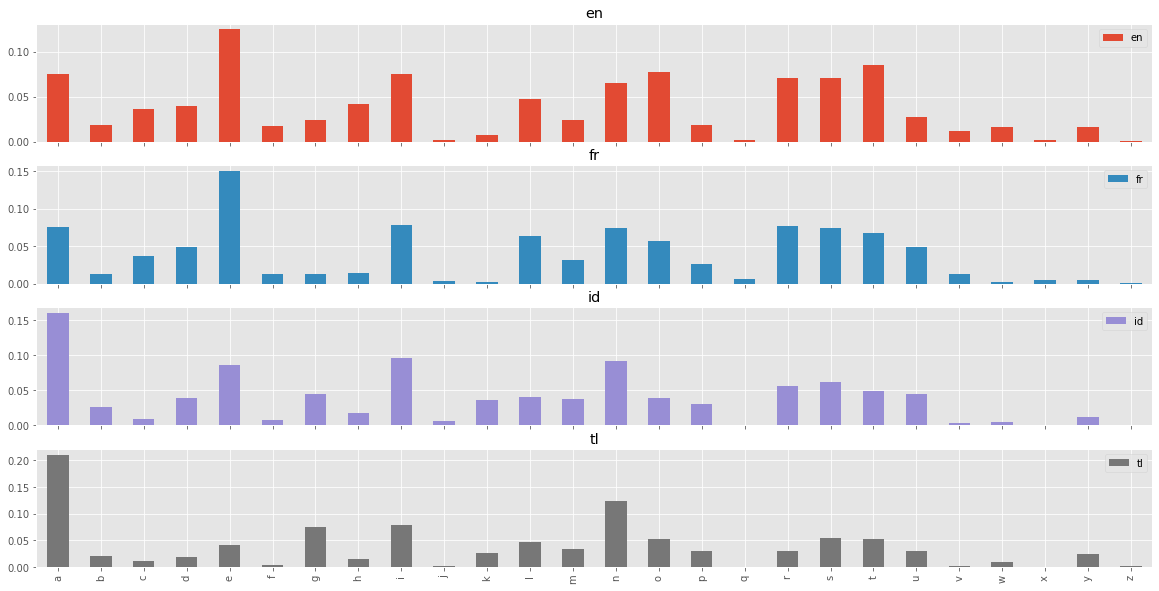

In [62]:
# 시각화를 통해서 빈도 표시
plt.style.use('ggplot')
# 플로팅
df_tmp_pv.T.plot(kind='bar', subplots=True, figsize=(20,10))
# 저장
plt.savefig('a_z_per_freqs.png')
# 보여라
plt.show()

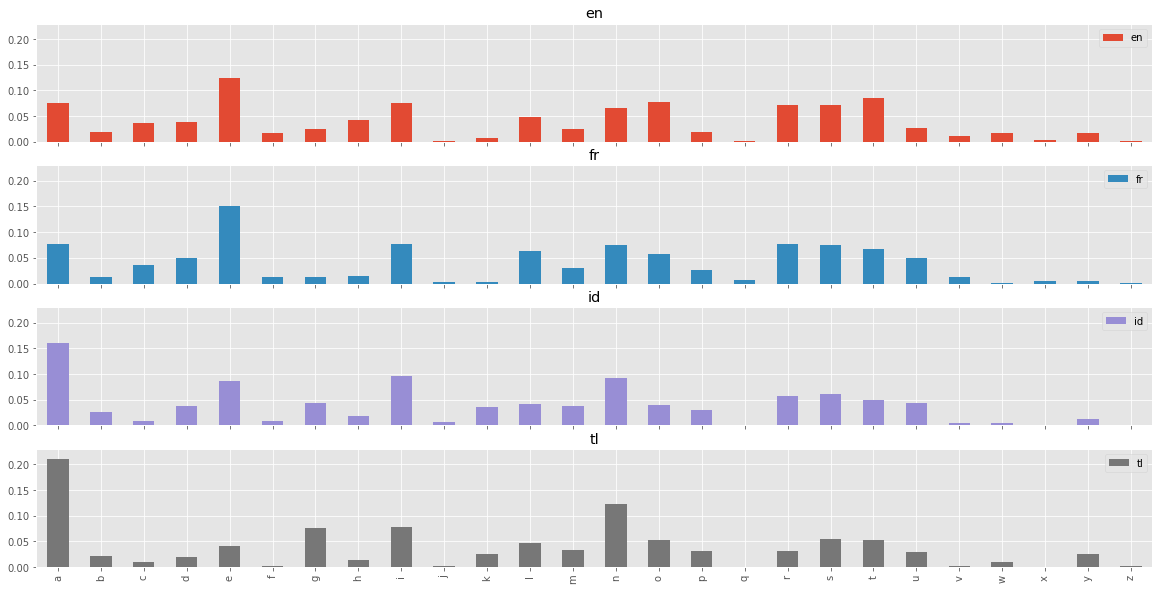

In [63]:
plt.style.use('ggplot')
df_tmp_pv.T.plot(kind='bar', subplots=True, figsize=(20,10), ylim=(0, 0.23))
plt.savefig('a_z_per_freqs.png')
plt.show()

In [64]:
df_tmp.labels.unique()

array(['en', 'fr', 'id', 'tl'], dtype=object)

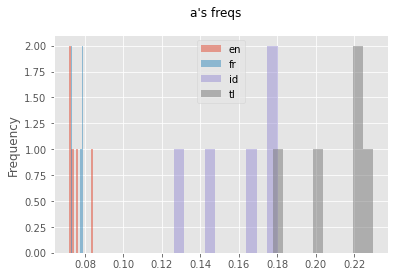

In [65]:
# 어느 정도 구분은 가능하나, 디테일한 구분이 되지 않는다.
# 히스토그램을 통해서 빈도를 겹쳐서 처리하면 구분이 될 것이다.
# a 혹은 b 같은 특정 알파벳의 빈도를 겹쳐그려서 어느 쪽에 많이 밀집되어 있는지 확인이 可
# 피벗 말고 오리지널 데이터 사용
for word in ascii_lowercase :
  # 정답의 종류 개수만큼만 그린다.
  for na in df_tmp.labels.unique() :
    # ex) labels 데이터가 en인 데이터 중에서, word(a)인 컬럼만 모은다.
    # tmp.shape은 (5,1) -> 분포 확인 -> 겹치는가 or 구분되는가
    tmp = df_tmp[df_tmp.labels == na][word]
    # print(type(tmp))
    tmp.plot(kind='hist', alpha=0.5, label=na)  # na는 en, fr, id, tl로 데이터 구분
  # 범례 표시
  plt.legend()
  plt.suptitle(f"{word}\'s freqs")
  plt.savefig(f"{word}_freq.png")
  plt.show()
  # break 지우면 a-z
  break

# a만 본다면 en, fr vs id, tl는 구분 可
# tl, id도 어느정도 구분 可
# en, fr은 구분하기 어렵다 => b-z의 빈도를 비교해야 한다.

- 사람이 구분하기 위해서 단순하게 빈도만 본다면, a-z 각각의 비중을 둬서 확률적으로 계산을 해야할 것이다.
- 이는 기계학습을 통해서 스스로 패턴을 찾을 수 있게 해준다면, 비교적 손쉽게 빈도를 통해 언어를 구분할 수 있을 것이다.

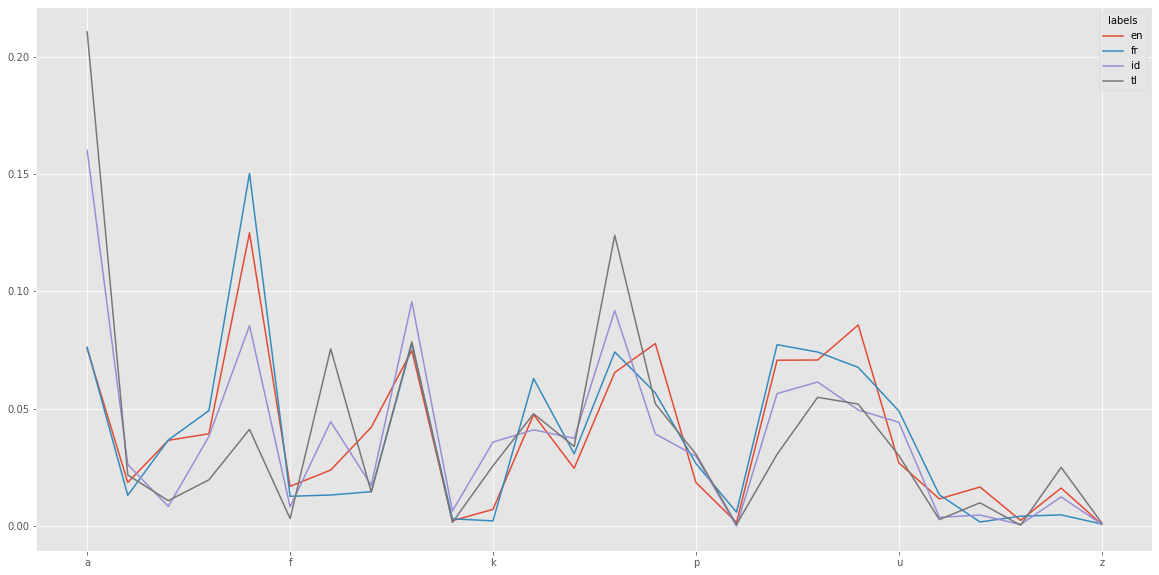

In [66]:
df_tmp_pv.T.plot(kind='line', figsize=(20, 10))

# 5. 모델 구축


## 시퀀스(순서, 절차)
- 알고리즘 선택
  - 선택시트, 경험적인 요소, 최근 주류 알고리즘 등을 선택 可
- 학습용 데이터 / 테스트용 데이터 분류
  - 일반적으로 데이터를 75:25(황금비율)로 분할
  - 통계 쪽은 8:2로 분할
- 학습
  - 오프라인 학습, 온라인 학습
  - 전이학습, 배치학습, 에포크 등
- 예측
  - 지도학습 => 정확도(분류), 손실값(회귀)
- 성능평가 (생략)
- 최적화 (생략)
  - 하이퍼파라미터 튜닝
  - 교차 검증
  - 파이프라인 구축
- 모델덤프
  - *.model, *.확장자 (확장자는 취향껏 정할 수 있음)

## 알고리즘 선택
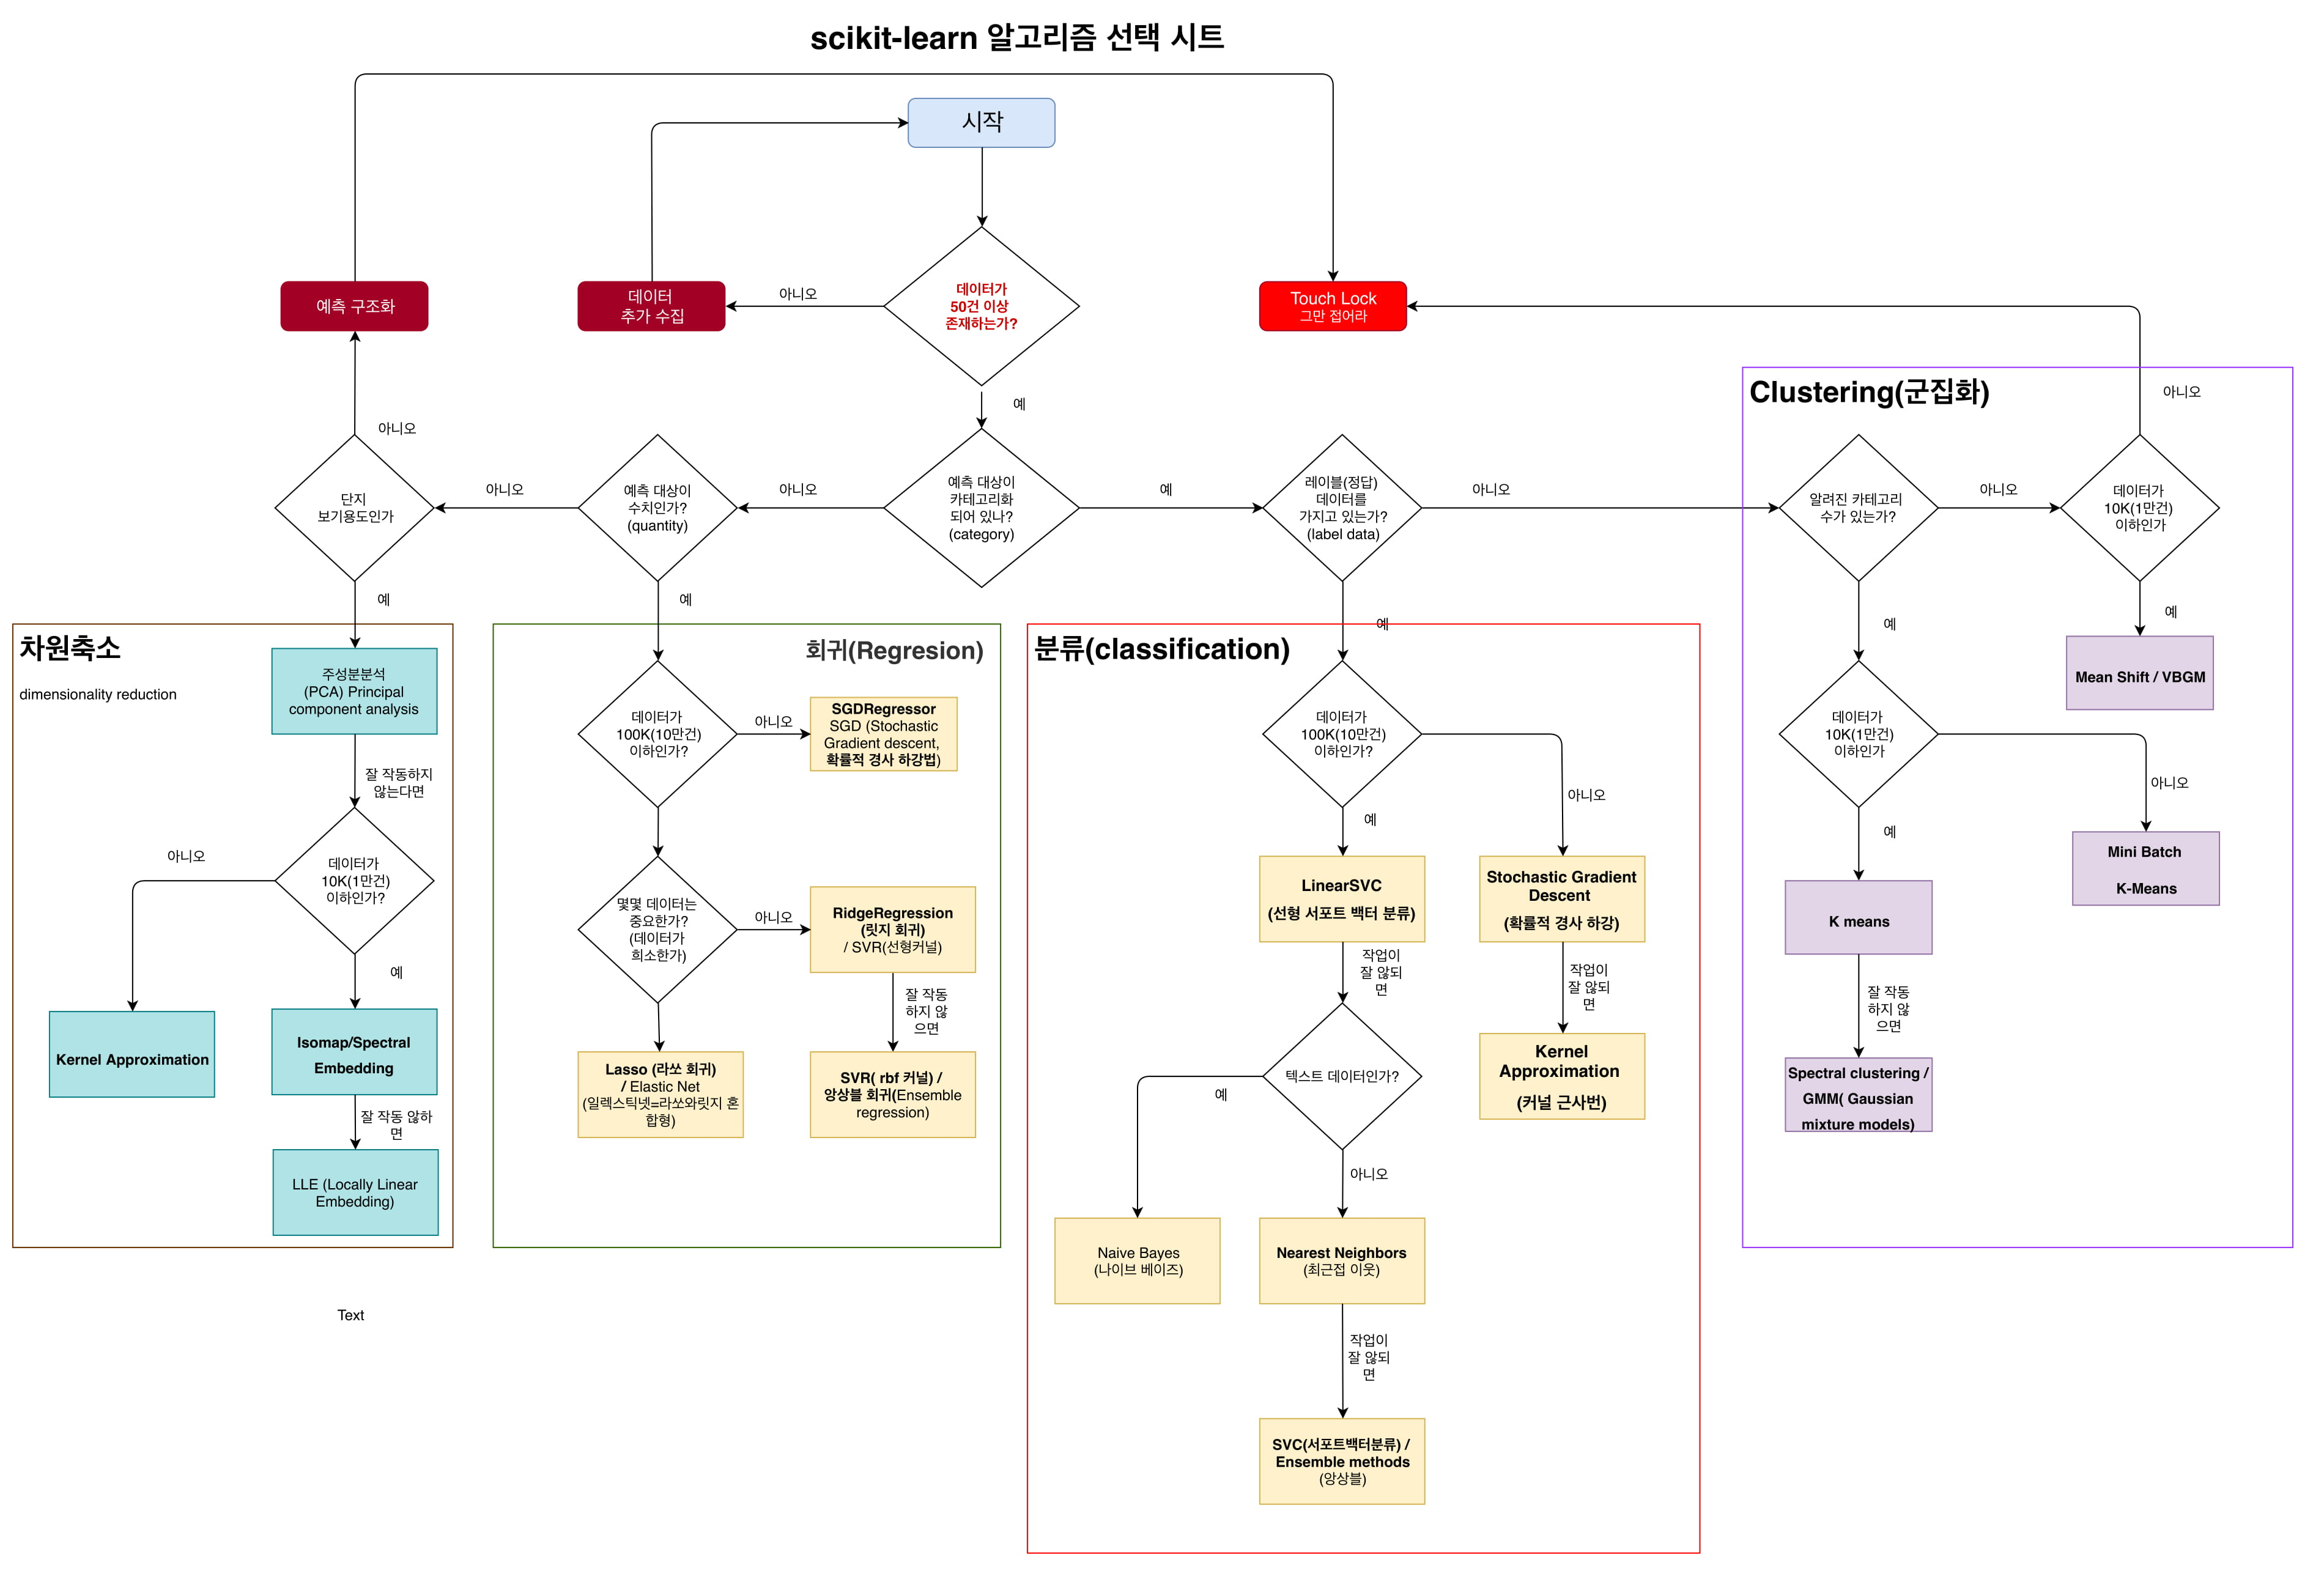
- 선택 시트에 의해서, SVM을 사용하겠다.

In [67]:
# !pip install scikit-learn==0.22.1

In [68]:
from sklearn import svm

# 이미지 부풀리기, 이미지 증폭 시에 주로 사용(여기서는 사용X) -> 데이터가 부족할 때 사용
import skimage

In [69]:
# 모델, 알고리즘, 분류기
# 알고리즘을 만들고 싶다 : C, C++ => Cython + Python
# 현재 하이퍼파라미터 값은 기본값으로 세팅되어 있다.
clf = svm.SVC()

## 학습용, 테스트용 데이터 분류
- 머신러닝의 황금비율 
  - 훈련 75% : 테스트 25% <- 대체적으로 이런 비율로 사용한다.
  - 훈련 75%(50:25(75 중 25는 검증용)) : 테스트 25%

In [70]:
with open('/content/labels_freqs.json') as f:
  tmp = json.load(f)

In [71]:
# 현재 데이터는 json을 로드해서, tmp 변수에 담겨져있다.
# 설정 : 데이터가 충분하지 않기 때문에 75:25의 비율을 여기서는 생략한다.
# 현재 : 훈련용 20개, 테스트용 8개 존재
len(tmp[0]['labels']), len(tmp[1]['labels'])

(20, 8)

## 학습
- 배치학습
  - 만약 데이터가 6만개가 있다. 이 데이터를 한번에 다 모델에 주입해서 학습을 하면 배치학습이라 한다.
  - 주의 : 한번에 사용되는 메모리양, GPU의 메모리양을 초과할 가능성이 있다.
    - 데이터를 한번에 처리하기 힘드니, 쪼개서 학습한다. = 미니 배치학습
    - 한번 학습 시 사용하는 데이터양 = 배치사이즈(batch size)
    - 이렇게 학습을 수행해서 6만건을 모두 학습하면 '1세대 학습이 끝났다.'라고 표현한다. = 에폭(epoch)
    - 1 에폭 = 모든 샘플을 1회 학습 종료한 것

In [72]:
X = tmp[0]['freqs']   # 훈련 데이터 중 특징 : 독립변수
y = tmp[0]['labels']  # 훈련 데이터 중 정답 : 종속변수
clf.fit(X, y)

# 알고리즘이 학습(훈련)이 되었다.

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## 예측
- 한번도 접하지 못한 데이터를 가지고 예측 수행

In [73]:
X = tmp[1]['freqs']
y_ = clf.predict(X)
y_

array(['en', 'en', 'fr', 'fr', 'id', 'id', 'tl', 'tl'], dtype='<U2')

## 성능평가
- 분류의 성능평가법
  - 오차행렬(혼동행렬) -> 정확도, 정밀도, f1-score, AUC, ROC커브
  - 정확도[%]가 100에 가까울수록 좋은 성능을 낸다.
- 회귀의 성능평가법
  - 손실함수값 : RMSE값이 0에 가까울수록 좋은 성능을 낸다.

In [74]:
# 평가도구
from sklearn import metrics

In [75]:
metrics.accuracy_score(tmp[1]['labels'], y_)

# 1.0 -> 과적합, 데이터가 적어서 1.0으로 나오는 것으로 예상됨

1.0

In [76]:
# 오차행렬을 대비 계산한 정밀도, 정확도, f1-score 등의 지표가 나온다.
reports = metrics.classification_report(tmp[1]['labels'], y_)
print(reports)

              precision    recall  f1-score   support

          en       1.00      1.00      1.00         2
          fr       1.00      1.00      1.00         2
          id       1.00      1.00      1.00         2
          tl       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



## 최적화
- 여기서는 최적화 부분은 생략

## 모델 덤프
- 이렇게 만들어진(학습된 알고리즘을) 모델을 시스템(서비스 등)에서 사용하기 위해 덤프 처리(파일로 저장)한다.
- 학습하여 덤프 치는 곳과 실제 사용하는 곳(시스템)이 상이하고, 실시간으로 업데이트 되지 않기 때문에 이런 경우 오프라인 학습법으로 만들었다고 표현한다.
- 오프라인 학습의 모델 적용
  - 시스템 종료
  - 모델 교체
  - 시스템 재가동

In [77]:
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [78]:
joblib.dump(clf, 'lang_detect.model')

['lang_detect.model']

In [79]:
# 레이블 저장
label_dict = {
    'en' : '영어',
    'fr' : '프랑스어',
    'id' : '인도네시아어',
    'tl' : '타갈로그어'
}
joblib.dump(label_dict, 'labels.json')

['labels.json']

In [80]:
joblib.load('labels.json')

{'en': '영어', 'fr': '프랑스어', 'id': '인도네시아어', 'tl': '타갈로그어'}

# 6. 시스템 통합

## 웹서비스 구축
- flask 구축
- 학습된 모델을 덤프
- flask에서 모델 구동
  - 언어 감지 서비스를 제공